In [8]:
import torch
from model import IntegralModel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trained_model = IntegralModel.load_from_checkpoint("trained_model/nop1_v5.ckpt")
trained_model.to(device)
trained_model.eval()

trained_model2 = IntegralModel.load_from_checkpoint("trained_model/nop2_v28.ckpt")
trained_model2.to(device)
trained_model2.eval()

IntegralModel(
  (layers): ModuleList(
    (0): Linear(in_features=41, out_features=2560, bias=True)
  )
  (output_layer): Linear(in_features=2560, out_features=1, bias=True)
  (activation): ReLU()
  (loss): MSELoss()
)

In [6]:
grid = np.array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
       0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
       0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ])

linear = np.array([0.        , 0.05128205, 0.1025641 , 0.15384615, 0.20512821,
       0.25641026, 0.30769231, 0.35897436, 0.41025641, 0.46153846,
       0.51282051, 0.56410256, 0.61538462, 0.66666667, 0.71794872,
       0.76923077, 0.82051282, 0.87179487, 0.92307692, 0.97435897,
       1.02564103, 1.07692308, 1.12820513, 1.17948718, 1.23076923,
       1.28205128, 1.33333333, 1.38461538, 1.43589744, 1.48717949,
       1.53846154, 1.58974359, 1.64102564, 1.69230769, 1.74358974,
       1.79487179, 1.84615385, 1.8974359 , 1.94871795, 2.        ])

In [14]:
def plot_model_prediction(model, x, y):    

    pred_antiderivative_x = x
    pred_antiderivative_y = []
    for i in x:
        res = model(torch.tensor(np.append(y, i)).to(model.device))
        pred_antiderivative_y.append(res.item())

    # plot the antiderivative
    plt.plot(pred_antiderivative_x, pred_antiderivative_y, label="pred F(x)")
    
    # plot the original function
    plt.plot(x, y, label="f(x)")
    
    plt.xlabel("x")
    plt.legend()
    plt.title("Integrand function and model prediction")
    plt.grid()
    
    print("Model prediction: ", pred_antiderivative_y[-1])
    plt.show()   


NOP1
Model prediction:  1.0026699788826934


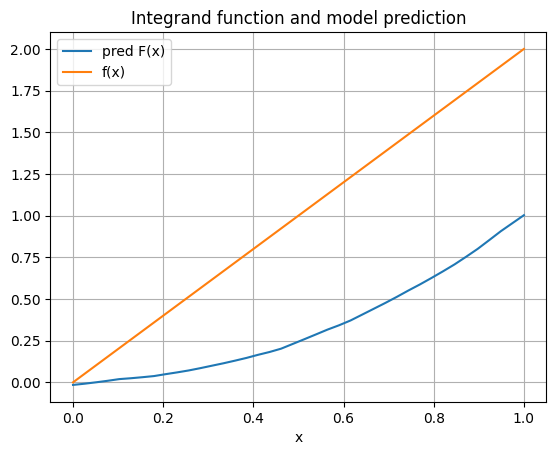

In [15]:
print("NOP1")
plot_model_prediction(trained_model, grid, linear)

NOP2
Model prediction:  1.0729556471059318


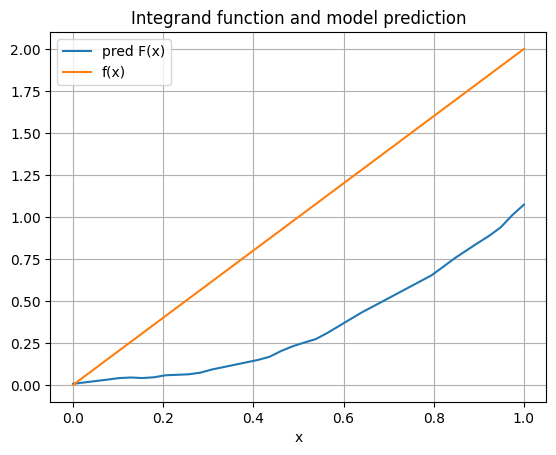

In [16]:
print("NOP2")
plot_model_prediction(trained_model2, grid, linear)